In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load your corresponding dataframe
df = pd.read_csv('esann_processed.csv')


In [3]:
import umap.umap_ as umap
# Load the embeddings from .npy file
specter_embeddings = np.load('specter_embeddings.npy')



In [4]:
embedding_df = pd.DataFrame(specter_embeddings)
df_embed_sample = embedding_df.head(3).iloc[:, :10]  # first 3 docs, first 10 dims
df_embed_sample


0         1         2         3         4         5         6  \
0 -0.344718  0.507638  0.719744 -0.348168 -0.143276 -0.074644  0.926749   
1 -0.646376  0.668703  0.334525 -0.040938 -0.139105  0.413836  0.493172   
2 -0.571975  0.166550  0.024166 -0.285710 -0.680282  0.559861  0.561474   

          7         8         9  
0  0.712313  0.004281  0.450406  
1  0.287579 -0.174322 -0.066701  
2 -0.199580 -0.400306  0.351115

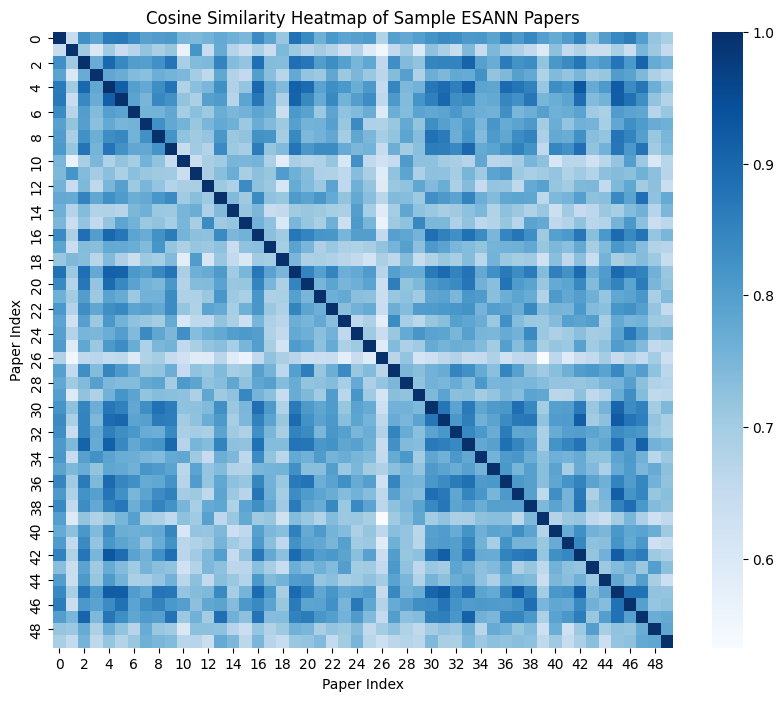

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

sample_embeddings = embedding_df.sample(50, random_state=42)
similarity_matrix = cosine_similarity(sample_embeddings)

plt.figure(figsize=(10,8))
sns.heatmap(similarity_matrix, cmap="Blues", annot=False)
plt.title("Cosine Similarity Heatmap of Sample ESANN Papers")
plt.xlabel("Paper Index")
plt.ylabel("Paper Index")
plt.show()


In [6]:
df.head(5)

Title  \
0       TreeESN: a Preliminary Experimental Analysis   
1  Free-energy-based Reinforcement Learning in a ...   
2  Towards sub-quadratic learning of probability ...   
3                Heuristics Miner for Time Intervals   
4  Learning vector quantization for heterogeneous...   

                                             Authors  \
0                Claudio Gallicchio, Alessio Micheli   
1     Makoto Otsuka, Junichiro Yoshimoto, Kenji Doya   
2  François Schnitzler, Philippe Leray, Louis Weh...   
3               Andrea Burattin, Alessandro Sperduti   
4  Dietlind Zühlke, Frank-Michael Schleif, Tina G...   

                                        Affiliations  \
0  1 - Department of Computer Science University ...   
1  1 - Initial Research Project Okinawa Institute...   
2  1 - Université de Liège -Department of EECS & ...   
3  1 - Department of Pure and Applied Mathematics...   
4  1 - -RWTH Aachen -Information Systems -Life Sc...   

                                            Abstract  \
0  In this paper we introduce an efficient approa...   
1  Free-energy-based reinforcement learning (FERL...   
2  We consider randomization schemes of the Chow-...   
3  Process Mining attempts to reconstruct the wor...   
4  In this paper we introduce an approach to inte...   

                                            Keywords  \
0  Machine learning techniques based on random pr...   
1                                       Learning III   
2                      Mixture and generative models   
3   Computational Intelligence Business Applications   
4                      Sparse representation of data   

                                            PDF Link  Year  Match Score  \
0  https://www.esann.org/sites/default/files/proc...  2010   100.000000   
1  https://www.esann.org/sites/default/files/proc...  2010    73.076923   
2  https://www.esann.org/sites/default/files/proc...  2010   100.000000   
3  https://www.esann.org/sites/default/files/proc...  2010   100.000000   
4  https://www.esann.org/sites/default/files/proc...  2010   100.000000   

                                          Text_clean  
0  TreeESN: a Preliminary Experimental Analysis I...  
1  Free-energy-based Reinforcement Learning in a ...  
2  Towards sub-quadratic learning of probability ...  
3  Heuristics Miner for Time Intervals Process Mi...  
4  Learning vector quantization for heterogeneous...

#### Dimensionality Reduction with UMAP

- This section focuses on reducing the high-dimensional SPECTER embeddings to a lower-dimensional space, typically 2D, for effective visualization and preliminary cluster identification.

In [7]:
reducer = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(specter_embeddings)

df['x'] = embedding_2d[:, 0]
df['y'] = embedding_2d[:, 1]

/home/aria/miniconda3/envs/data-science/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [8]:
df

Title  \
0          TreeESN: a Preliminary Experimental Analysis   
1     Free-energy-based Reinforcement Learning in a ...   
2     Towards sub-quadratic learning of probability ...   
3                   Heuristics Miner for Time Intervals   
4     Learning vector quantization for heterogeneous...   
...                                                 ...   
1659  Encoding hyperspectral data with low-bond dime...   
1660  The Role of the Learning Rate in Layered Neura...   
1661  Early Prediction of Dynamic Sparsity in Large ...   
1662  Enhancing Computer Vision with Knowledge: a Ru...   
1663  Linear Domain Adaptation for Robustness to Ele...   

                                                Authors  \
0                   Claudio Gallicchio, Alessio Micheli   
1        Makoto Otsuka, Junichiro Yoshimoto, Kenji Doya   
2     François Schnitzler, Philippe Leray, Louis Weh...   
3                  Andrea Burattin, Alessandro Sperduti   
4     Dietlind Zühlke, Frank-Michael Schleif, Tina G...   
...                                                 ...   
1659  Fabian Fischbach, Hans-Martin Rieser, Oliver S...   
1660   Otavio Citton, Frederieke Richert, Michael Biehl   
1661  Reza Sedghi, Amit Pal, Anand Subramoney, David...   
1662  Simon Vandevelde, Laurent Mertens, Sverre Lauw...   
1663                           Rui Liu, Benjamin Paaßen   

                                           Affiliations  \
0     1 - Department of Computer Science University ...   
1     1 - Initial Research Project Okinawa Institute...   
2     1 - Université de Liège -Department of EECS & ...   
3     1 - Department of Pure and Applied Mathematics...   
4     1 - -RWTH Aachen -Information Systems -Life Sc...   
...                                                 ...   
1659  1 - DLR Institute for AI Safety and Security -...   
1660  1 - Computer Science and Artificial Intelligen...   
1661  1 - Institut für Neuroinformatik Ruhr Universi...   
1662  1 - KU Leuven -Dept. Of Computer Science J.-P....   
1663  1 - Faculty of Technology Bielefeld University...   

                                               Abstract  \
0     In this paper we introduce an efficient approa...   
1     Free-energy-based reinforcement learning (FERL...   
2     We consider randomization schemes of the Chow-...   
3     Process Mining attempts to reconstruct the wor...   
4     In this paper we introduce an approach to inte...   
...                                                 ...   
1659  Encoding data on a quantum computer poses a ma...   
1660  Using the statistical physics framework, we st...   
1661  Large language models are powerful but computa...   
1662  Artificial Neural Networks excel at identifyin...   
1663  Machine learning approaches have shown impress...   

                                               Keywords  \
0     Machine learning techniques based on random pr...   
1                                          Learning III   
2                         Mixture and generative models   
3      Computational Intelligence Business Applications   
4                         Sparse representation of data   
...                                                 ...   
1659        Deep and kernel methods: best of two worlds   
1660                  Online learning and concept drift   
1661  Fairness and Interpretability, Clustering, and...   
1662                     Kernels, graphs and clustering   
1663                      Classification and regression   

                                               PDF Link  Year  Match Score  \
0     https://www.esann.org/sites/default/files/proc...  2010   100.000000   
1     https://www.esann.org/sites/default/files/proc...  2010    73.076923   
2     https://www.esann.org/sites/default/files/proc...  2010   100.000000   
3     https://www.esann.org/sites/default/files/proc...  2010   100.000000   
4     https://www.esann.org/sites/default/files/proc...  2010   100.000000   
...                                  

In [9]:
from sklearn.cluster import DBSCAN
# 3. Run DBSCAN clustering
clustering = DBSCAN(eps=0.3, min_samples=10).fit(df[['x', 'y']])
df['clusters'] = clustering.labels_

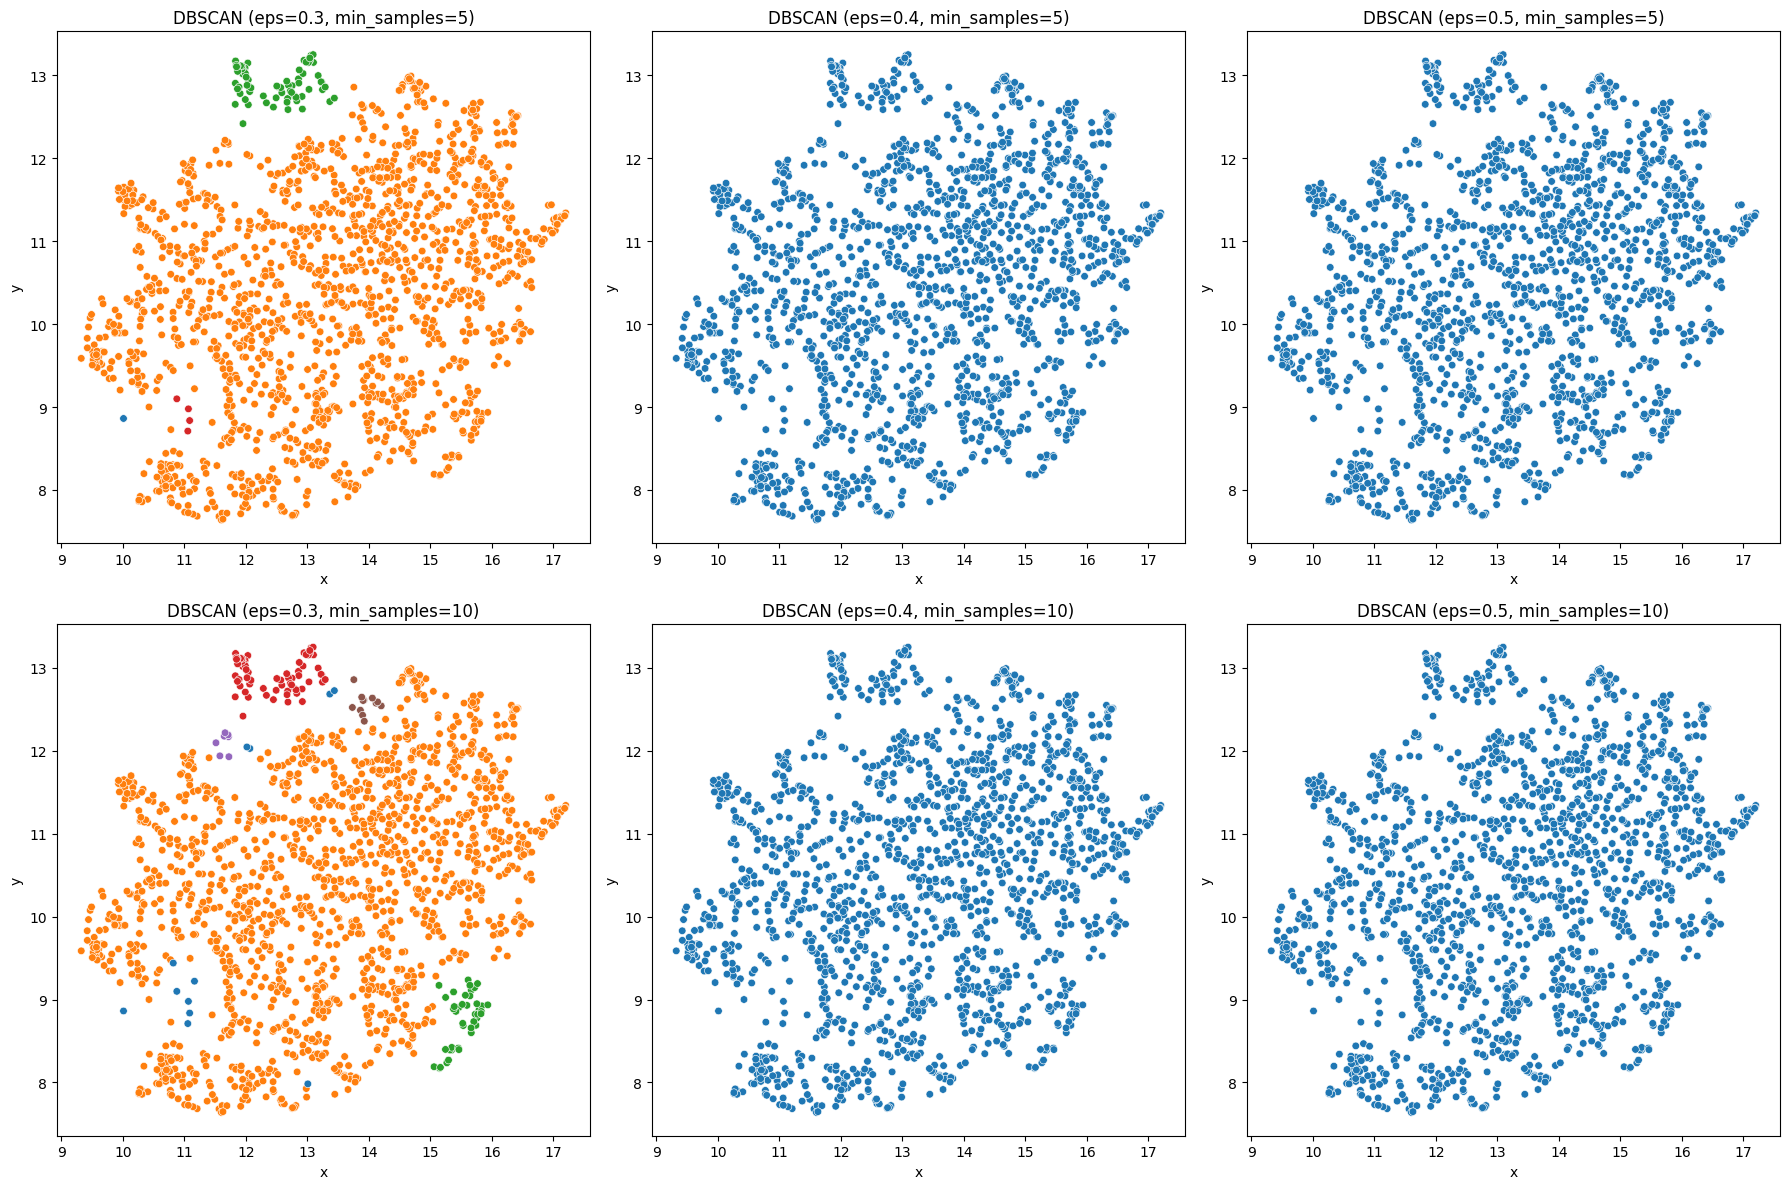

In [10]:
from sklearn.cluster import DBSCAN

# Try multiple DBSCAN parameter combinations
param_grid = [(0.3, 5), (0.4, 5), (0.5, 5), (0.3, 10), (0.4, 10), (0.5, 10)]

plt.figure(figsize=(18, 12))
for i, (eps, min_samples) in enumerate(param_grid, 1):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    df['clusters'] = dbscan.fit_predict(embedding_2d)

    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x='x', y='y', hue='clusters', palette='tab10', s=30, legend=False)
    plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")

plt.tight_layout()
plt.show()




#### Analyzing Topic Drift Over Time


/home/aria/miniconda3/envs/data-science/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/aria/miniconda3/envs/data-science/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


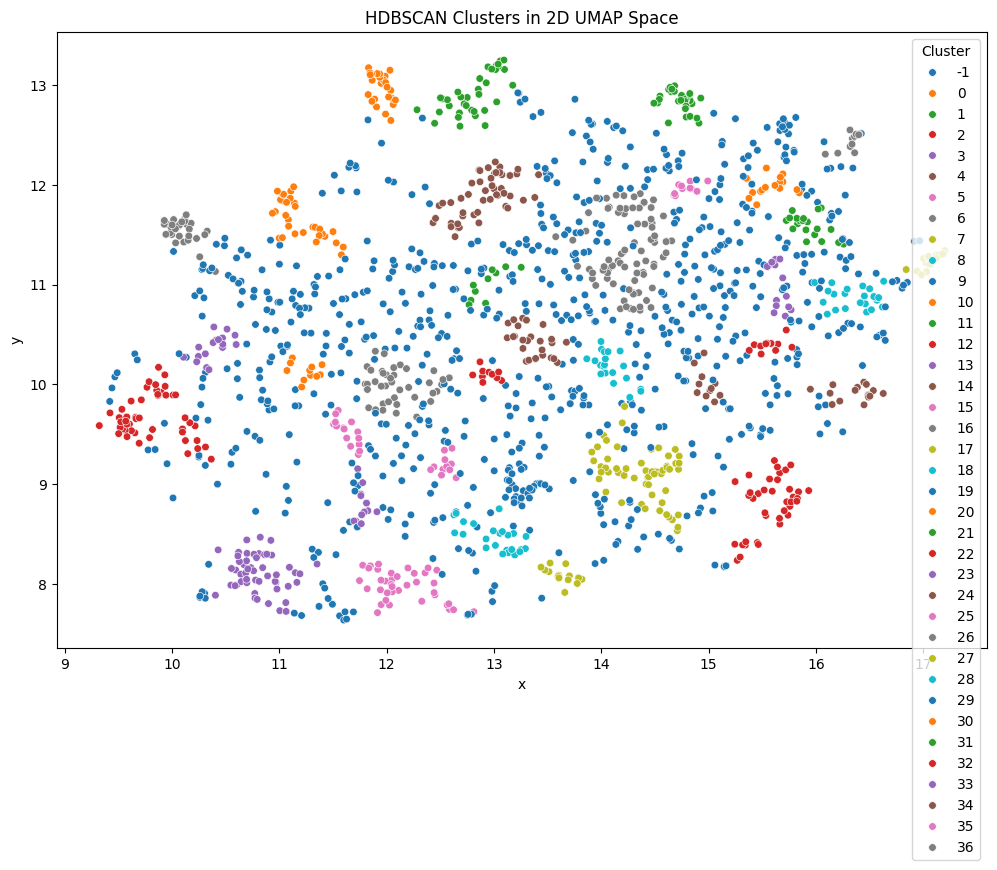

In [ ]:
import hdbscan
from collections import Counter


# HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
df['cluster'] = clusterer.fit_predict(embedding_2d)

# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='tab10', s=30)
plt.title("HDBSCAN Clusters in 2D UMAP Space")
plt.legend(title='Cluster')
plt.show()


/home/aria/miniconda3/envs/data-science/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/aria/miniconda3/envs/data-science/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


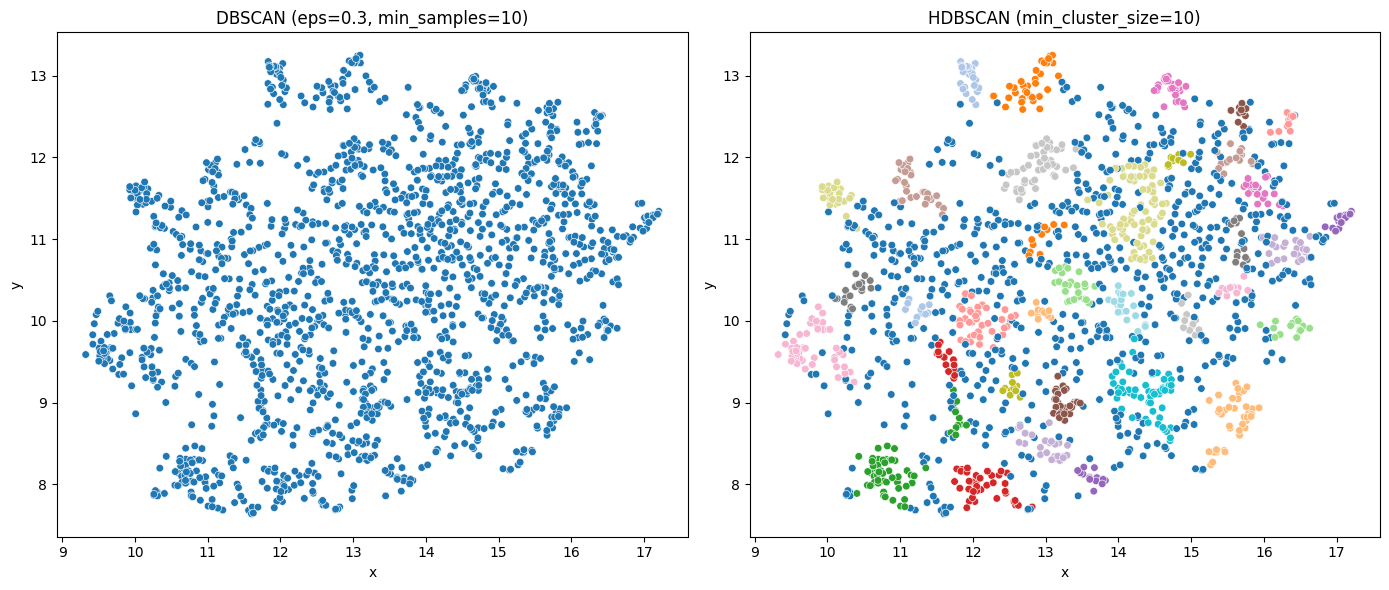

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import hdbscan

# --- DBSCAN ---
dbscan = DBSCAN(eps=0.3, min_samples=10)
df['dbscan_cluster'] = dbscan.fit_predict(embedding_2d)

# --- HDBSCAN ---
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
df['hdbscan_cluster'] = clusterer.fit_predict(embedding_2d)

# --- Plot side by side ---
plt.figure(figsize=(14, 6))

# DBSCAN plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='x', y='y', hue='clusters', palette='tab10', s=30, legend=False)
plt.title("DBSCAN (eps=0.3, min_samples=10)")

# HDBSCAN plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='tab20', s=30, legend=False)
plt.title("HDBSCAN (min_cluster_size=10)")

plt.tight_layout()
plt.show()


In [13]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Load same model used for embeddings (important for semantic similarity)
model = SentenceTransformer('allenai-specter')

def label_clusters_semantic(df, embeddings, cluster_column='cluster', top_n_keywords=5):
    cluster_labels = {}
    
    for cluster_id in sorted(df[cluster_column].unique()):
        if cluster_id == -1:  # skip noise from HDBSCAN
            continue
        
        # --- Select cluster subset ---
        cluster_mask = df[cluster_column] == cluster_id
        cluster_texts = df.loc[cluster_mask, 'Text_clean'].tolist()
        cluster_embs = embeddings[cluster_mask]
        
        # --- 1. Find cluster centroid ---
        centroid = cluster_embs.mean(axis=0)
        
        # --- 2. Extract semantic keywords ---
        full_text = " ".join(cluster_texts)
        vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english').fit([full_text])
        candidates = vectorizer.get_feature_names_out()
        
        candidate_embs = model.encode(candidates, show_progress_bar=False)
        
        sims = np.dot(candidate_embs, centroid) / (
            np.linalg.norm(candidate_embs, axis=1) * np.linalg.norm(centroid)
        )
        
        top_idx = sims.argsort()[::-1][:top_n_keywords]
        top_keywords = [candidates[i] for i in top_idx]
        
        # --- 3. Find representative paper title ---
        sims_papers = np.dot(cluster_embs, centroid) / (
            np.linalg.norm(cluster_embs, axis=1) * np.linalg.norm(centroid)
        )
        best_idx = df.loc[cluster_mask].index[np.argmax(sims_papers)]
        rep_title = df.loc[best_idx, 'Title']
        
        # --- 4. Combine into label ---
        cluster_labels[cluster_id] = {
            "keywords": top_keywords,
            "representative_title": rep_title,
            "label": f"{', '.join(top_keywords)} | {rep_title}"
        }
    
    return cluster_labels


In [14]:
#cluster_labels = label_clusters_semantic(df, specter_embeddings, cluster_column='cluster')
#df.columns


Top Growing Topics:
                                                    abs_growth  rel_growth
topics                                                                    
Data Mining / Big Data Analytics                             9   12.270531
Graph Learning / Graph Theory                                7    8.962624
Data Streams / Concept Drift                                 5    6.473430
Deep Learning for NLP (Language Models, Transla...           5    6.370071
Medical Imaging / Segmentation                               3    4.130435

Top Declining Topics:
                                                abs_growth  rel_growth
topics                                                                
Graph Visualization & Clustering                        -5  -11.963470
Feature Selection & Multi-Label Classification          -2   -7.452575
Vector & Matrix Quantization                            -2   -5.217391
Clustering Algorithms (Hierarchical & Others)           -2   -5.174129
Sparse

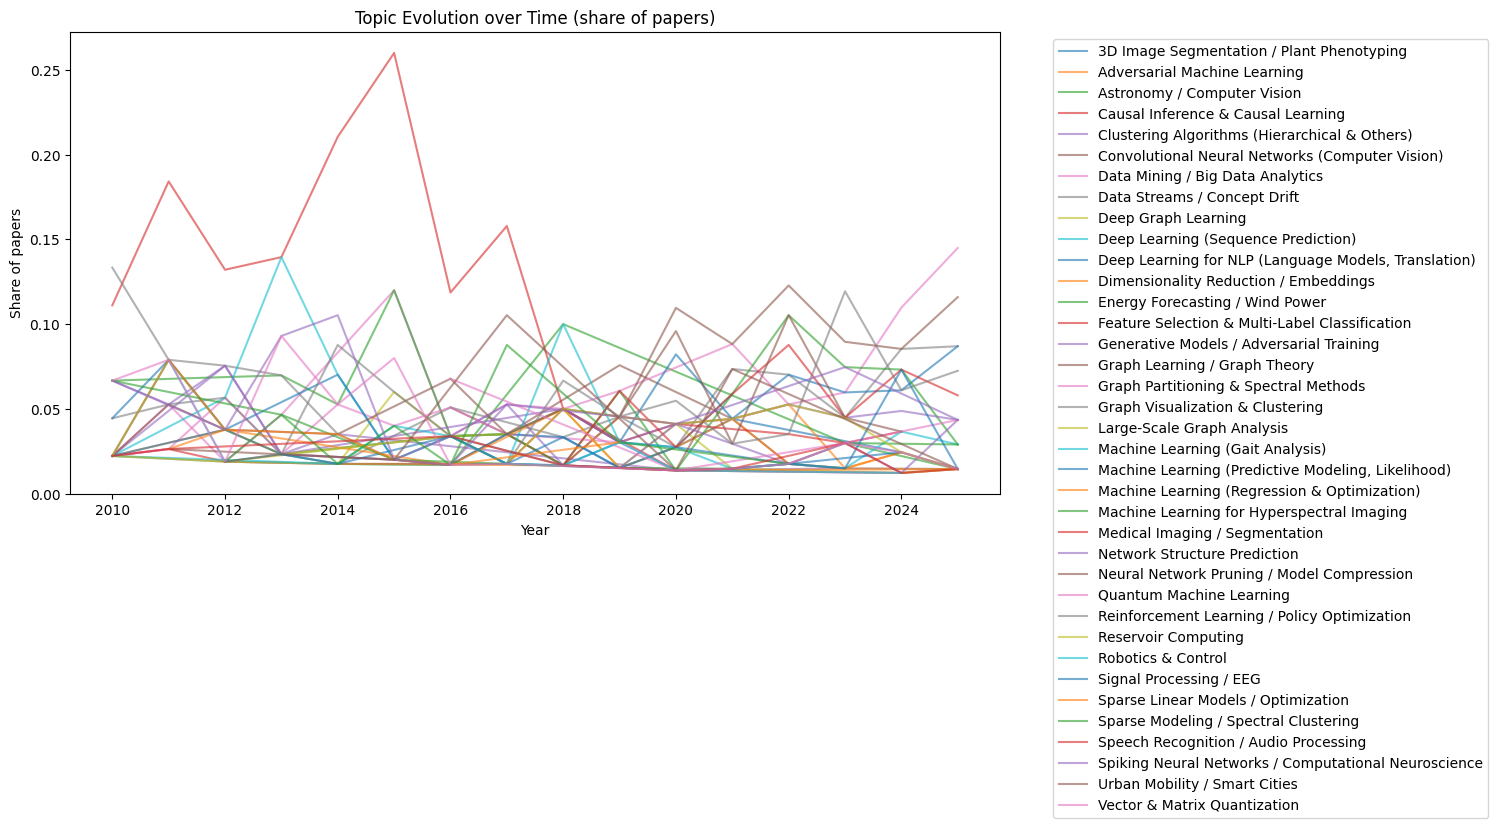

In [19]:
# --- Count papers per year per cluster ---
df = pd.read_csv("main_with_topics.csv")
topic_trends = df.groupby(['Year','topics']).size().reset_index(name='count')

# --- Normalize per year (fraction of total papers that year) ---
year_totals = topic_trends.groupby('Year')['count'].transform('sum')
topic_trends['share'] = topic_trends['count'] / year_totals

# --- Compute growth between first and last year ---
growth = topic_trends.groupby('topics').agg(
    start_year=('Year','min'),
    end_year=('Year','max'),
    start_count=('count','first'),
    end_count=('count','last'),
    start_share=('share','first'),
    end_share=('share','last')
)
growth['abs_growth'] = growth['end_count'] - growth['start_count']
growth['rel_growth'] = (growth['end_share'] - growth['start_share']) * 100

# --- Show top growing / declining topics ---
top_growing = growth.sort_values('rel_growth', ascending=False).head(5)
top_declining = growth.sort_values('rel_growth').head(5)

print("Top Growing Topics:")
print(top_growing[['abs_growth','rel_growth']])
print("\nTop Declining Topics:")
print(top_declining[['abs_growth','rel_growth']])

# --- Visualization: Topic evolution lines ---``
plt.figure(figsize=(12,6))
for label, grp in topic_trends.groupby('topics'):
    plt.plot(grp['Year'], grp['share'], label=label, alpha=0.6)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title("Topic Evolution over Time (share of papers)")
plt.xlabel("Year")
plt.ylabel("Share of papers")
plt.show()


In [17]:
# Save DataFrame to CSV
#cluster_df.to_csv("cluster_df.csv", index=False)
df.to_csv("main_df.csv", index=False)


In [20]:
import pandas as pd

# Load data
df = pd.read_csv("main_df.csv")
cluster_df = pd.read_csv("cluster_df.csv")

# Merge on 'cluster'
df = df.merge(
    cluster_df[["cluster", "topics"]], 
    on="cluster", 
    how="left"
)


In [21]:
df.head()

Title  \
0       TreeESN: a Preliminary Experimental Analysis   
1  Free-energy-based Reinforcement Learning in a ...   
2  Towards sub-quadratic learning of probability ...   
3                Heuristics Miner for Time Intervals   
4  Learning vector quantization for heterogeneous...   

                                             Authors  \
0                Claudio Gallicchio, Alessio Micheli   
1     Makoto Otsuka, Junichiro Yoshimoto, Kenji Doya   
2  François Schnitzler, Philippe Leray, Louis Weh...   
3               Andrea Burattin, Alessandro Sperduti   
4  Dietlind Zühlke, Frank-Michael Schleif, Tina G...   

                                        Affiliations  \
0  1 - Department of Computer Science University ...   
1  1 - Initial Research Project Okinawa Institute...   
2  1 - Université de Liège -Department of EECS & ...   
3  1 - Department of Pure and Applied Mathematics...   
4  1 - -RWTH Aachen -Information Systems -Life Sc...   

                                            Abstract  \
0  In this paper we introduce an efficient approa...   
1  Free-energy-based reinforcement learning (FERL...   
2  We consider randomization schemes of the Chow-...   
3  Process Mining attempts to reconstruct the wor...   
4  In this paper we introduce an approach to inte...   

                                            Keywords  \
0  Machine learning techniques based on random pr...   
1                                       Learning III   
2                      Mixture and generative models   
3   Computational Intelligence Business Applications   
4                      Sparse representation of data   

                                            PDF Link  Year  Match Score  \
0  https://www.esann.org/sites/default/files/proc...  2010   100.000000   
1  https://www.esann.org/sites/default/files/proc...  2010    73.076923   
2  https://www.esann.org/sites/default/files/proc...  2010   100.000000   
3  https://www.esann.org/sites/default/files/proc...  2010   100.000000   
4  https://www.esann.org/sites/default/files/proc...  2010   100.000000   

                                          Text_clean          x          y  \
0  TreeESN: a Preliminary Experimental Analysis I...  10.279290  11.151804   
1  Free-energy-based Reinforcement Learning in a ...   9.903395   9.919914   
2  Towards sub-quadratic learning of probability ...  13.865696  10.256889   
3  Heuristics Miner for Time Intervals Process Mi...  15.613661   9.236915   
4  Learning vector quantization for heterogeneous...  14.748999  12.896686   

   clusters  cluster  dbscan_cluster  hdbscan_cluster  \
0         0       -1               0               -1   
1         0       12               0               12   
2         0       18               0               18   
3         0        2               1                2   
4         0       11               0               11   

                                              topics  
0                                                NaN  
1       Reinforcement Learning / Policy Optimization  
2  Machine Learning (Predictive Modeling, Likelih...  
3                       Data Streams / Concept Drift  
4                       Vector & Matrix Quantization

In [22]:
import pandas as pd

# 1. Load your dataset
file_path = "cluster_labels.csv"   # change path if needed
cluster_df = pd.read_csv(file_path)

# 2. Define refined topics for each cluster
topics = {
    0: "Signal Processing / EEG",
    1: "Machine Learning (Gait Analysis)",
    2: "Data Streams / Concept Drift",
    3: "Graph Learning / Graph Theory",
    4: "Urban Mobility / Smart Cities",
    5: "Deep Learning for NLP (Language Models, Translation)",
    6: "Astronomy / Computer Vision",
    7: "Adversarial Machine Learning",
    8: "Generative Models / Adversarial Training",
    9: "Medical Imaging / Segmentation",
    10: "Spiking Neural Networks / Computational Neuroscience",
    11: "Vector & Matrix Quantization",
    12: "Reinforcement Learning / Policy Optimization",
    13: "Robotics & Control",
    14: "Energy Forecasting / Wind Power",
    15: "3D Image Segmentation / Plant Phenotyping",
    16: "Reservoir Computing",
    17: "Data Mining / Big Data Analytics",
    18: "Machine Learning (Predictive Modeling, Likelihood)",
    19: "Deep Graph Learning",
    20: "Deep Learning (Sequence Prediction)",
    21: "Machine Learning (Regression & Optimization)",
    22: "Quantum Machine Learning",
    23: "Speech Recognition / Audio Processing",
    24: "Network Structure Prediction",
    25: "Convolutional Neural Networks (Computer Vision)",
    26: "Neural Network Pruning / Model Compression",
    27: "Dimensionality Reduction / Embeddings",
    28: "Graph Visualization & Clustering",
    29: "Machine Learning for Hyperspectral Imaging",
    30: "Sparse Modeling / Spectral Clustering",
    31: "Graph Partitioning & Spectral Methods",
    32: "Large-Scale Graph Analysis",
    33: "Clustering Algorithms (Hierarchical & Others)",
    34: "Causal Inference & Causal Learning",
    35: "Sparse Linear Models / Optimization",
    36: "Feature Selection & Multi-Label Classification"
}

# 3. Assign refined topic labels
cluster_df["topics"] = cluster_df["cluster"].map(topics)



In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose a palette
palette = sns.color_palette("tab10")   # options: "Set1", "Set2", "Set3", "Paired", "tab10", "coolwarm", etc.

# Growing topics
pivot[top_growing.index[:5]].plot.area(
    figsize=(12,6),
    alpha=0.7,
    color=palette
)
plt.title("Top 5 Growing Topics")
plt.ylabel("Share of papers")
plt.show()

# Declining topics
pivot[top_declining.index[:5]].plot.area(
    figsize=(12,6),
    alpha=0.7,
    color=palette
)
plt.title("Top 5 Declining Topics")
plt.ylabel("Share of papers")
plt.show()


NameError: name 'pivot' is not defined

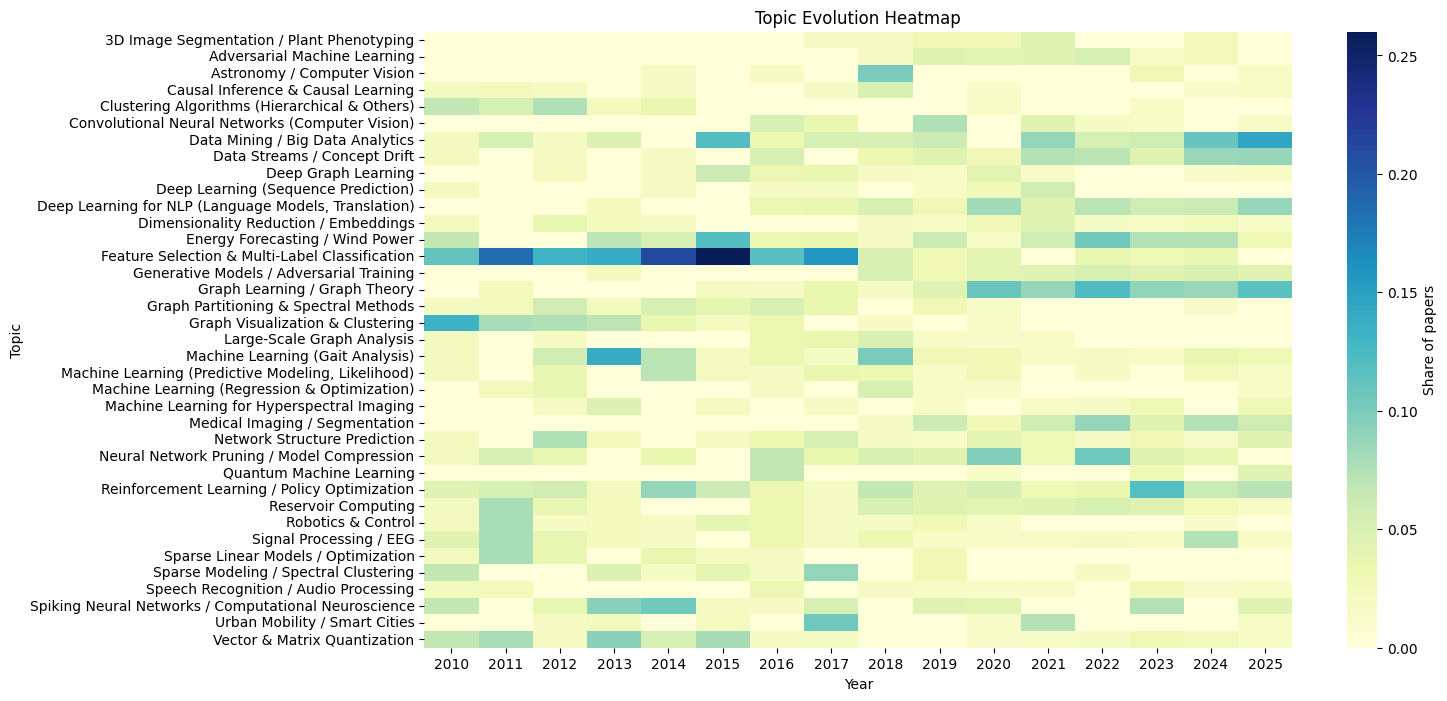

In [89]:
import seaborn as sns

pivot = topic_trends.pivot(index='topics', columns='Year', values='share').fillna(0)
plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap="YlGnBu", cbar_kws={'label': 'Share of papers'})
plt.title("Topic Evolution Heatmap")
plt.ylabel("Topic")
plt.xlabel("Year")
plt.show()


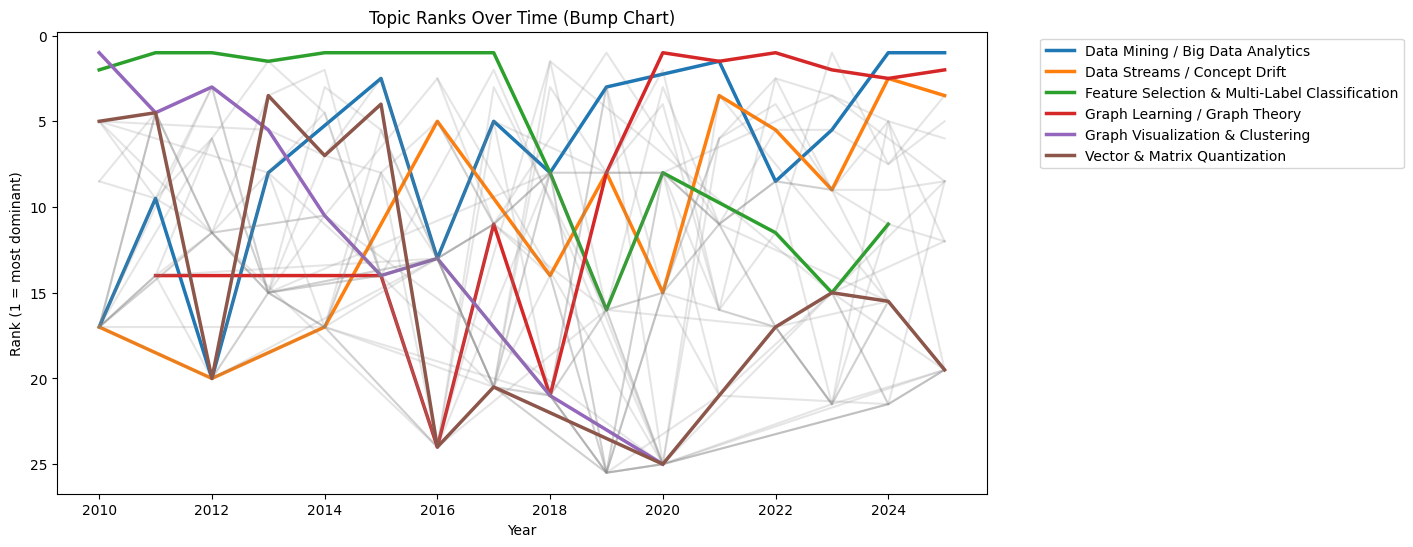

In [24]:
ranked = topic_trends.copy()
ranked['rank'] = ranked.groupby('Year')['share'].rank(ascending=False)

plt.figure(figsize=(12,6))
for label, grp in ranked.groupby('topics'):
    if label in list(top_growing.index[:3]) + list(top_declining.index[:3]):  # highlight only some
        plt.plot(grp['Year'], grp['rank'], label=label, linewidth=2.5)
    else:
        plt.plot(grp['Year'], grp['rank'], color="gray", alpha=0.2)

plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title("Topic Ranks Over Time (Bump Chart)")
plt.xlabel("Year")
plt.ylabel("Rank (1 = most dominant)")
plt.show()


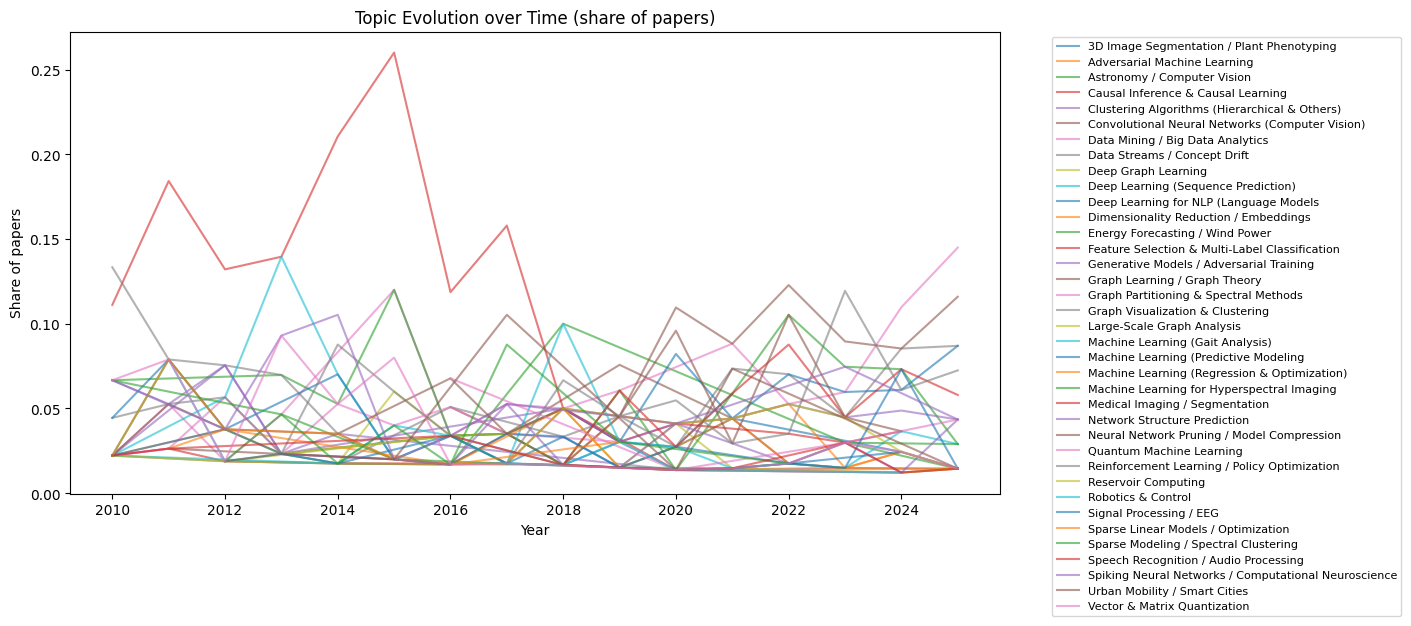

In [25]:
def short_label(label):
    return label.split(",")[0].strip()   # only first keyword

plt.figure(figsize=(12,6))
for label, grp in topic_trends.groupby('topics'):
    short = short_label(label)
    plt.plot(grp['Year'], grp['share'], label=short, alpha=0.6)

plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)
plt.title("Topic Evolution over Time (share of papers)")
plt.xlabel("Year")
plt.ylabel("Share of papers")
plt.show()


Storytelling angle for your dissertation:

Emerging topics: deep graph learning, streaming/real-time ML, LLMs, deep medical imaging.

Declining topics: feature selection, classical clustering, matrix factorization, traditional data visualization.

This shows the shift from classical ML methods → deep learning & large-scale applications.

# Evaluating Cluster Quality


- Well-separated, dense regions (e.g., clusters 0, 5, 10, 14, 17, etc.) indicate high confidence clusters with potentially coherent semantic topics (like a subfield in machine learning).
- Scattered points, especially with the grey -1 label, suggest less confident groupings — possibly documents that don't fit clearly into any major theme.
- Some clusters are larger, indicating dominant themes in your dataset.

### Silhouette Score
- Measures how well-separated the clusters are (−1 to 1; higher is better)

In [94]:
from sklearn.metrics import silhouette_score
import pandas as pd

results = []

for year, group in df.groupby("Year"):
    valid = group[group['cluster'] != -1]  # exclude noise
    if len(valid['cluster'].unique()) > 1:  # silhouette requires >= 2 clusters
        score = silhouette_score(valid[['x', 'y']], valid['cluster'])
    else:
        score = None
    results.append({
        "Year": year,
        "Silhouette": score,
        "Clusters": len(valid['cluster'].unique()),
        "Noise %": (group['cluster'] == -1).mean() * 100
    })

df_quality = pd.DataFrame(results)
df_quality




Year  Silhouette  Clusters    Noise %
0   2010    0.340492        24  48.275862
1   2011    0.554921        16  52.500000
2   2012    0.420403        24  49.523810
3   2013    0.456684        20  52.747253
4   2014    0.479241        21  49.557522
5   2015    0.394455        18  47.916667
6   2016    0.526958        28  47.787611
7   2017    0.503201        25  41.237113
8   2018    0.525468        26  46.902655
9   2019    0.523877        30  38.888889
10  2020    0.480919        31  37.606838
11  2021    0.617042        24  35.849057
12  2022    0.503994        21  34.482759
13  2023    0.592006        24  39.639640
14  2024    0.583462        24  30.508475
15  2025    0.501501        25  43.442623

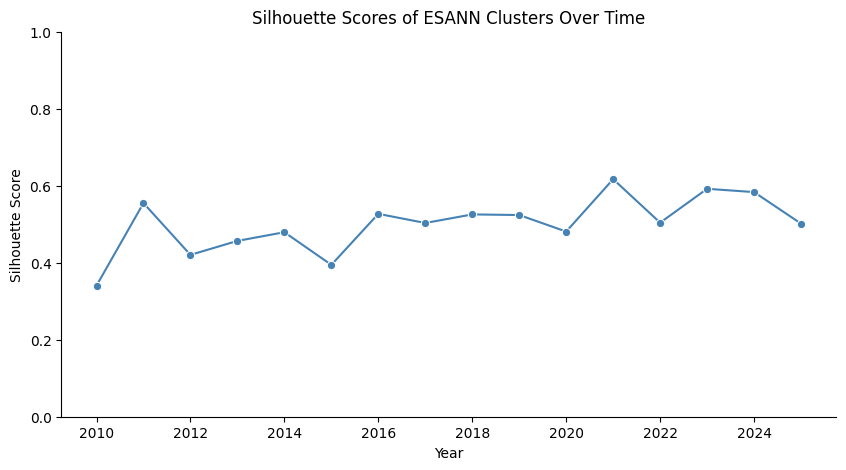

In [95]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_quality, x="Year", y="Silhouette", marker="o", color="steelblue")
plt.title("Silhouette Scores of ESANN Clusters Over Time")
plt.xlabel("Year")
plt.ylabel("Silhouette Score")
plt.ylim(0,1)
sns.despine()
plt.show()


In [24]:
#df.drop(columns=['clusters'], inplace=True)

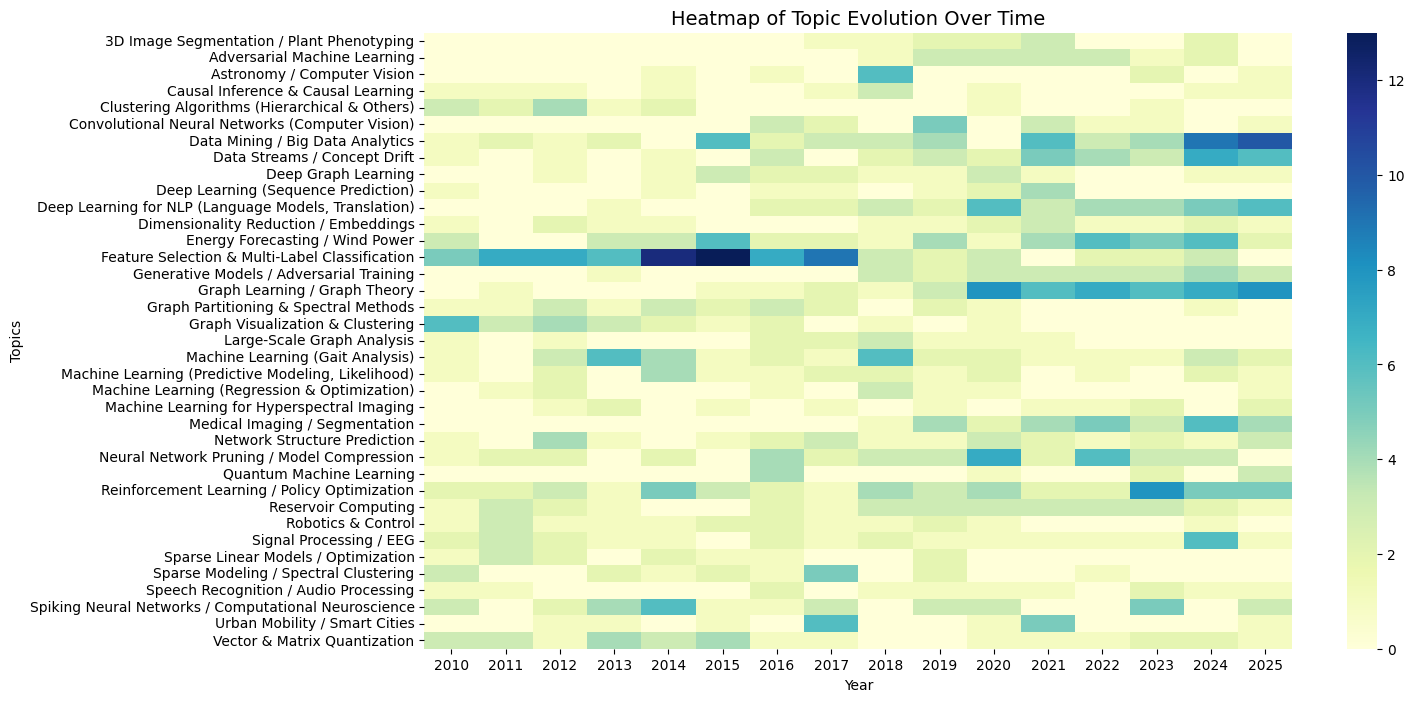

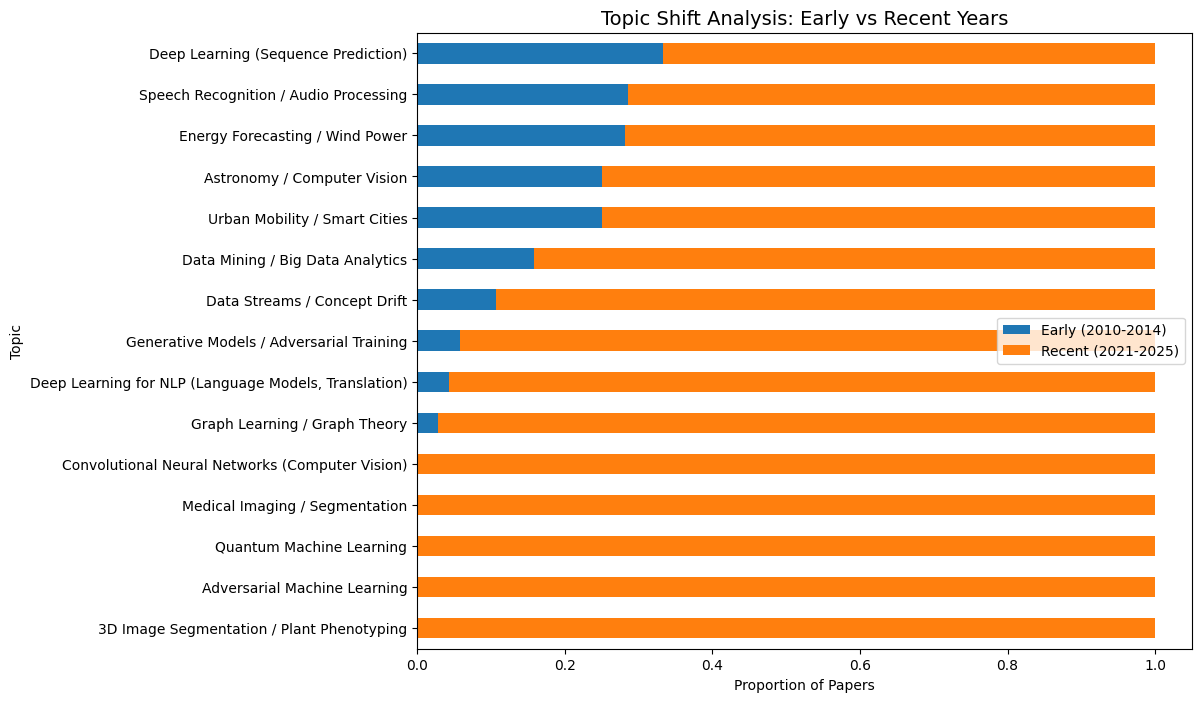

In [97]:
# --- Heatmap of Topic Evolution Over Time ---
df_topics = df.dropna(subset=["topics"])

topic_trend = df_topics.groupby(["Year", "topics"]).size().reset_index(name="count")
topic_trend_pivot = topic_trend.pivot(index="Year", columns="topics", values="count").fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(topic_trend_pivot.T, cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Topic Evolution Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Topics")
plt.show()


# --- Topic Shift Analysis (Early vs Recent) ---
min_year, max_year = df_topics["Year"].min(), df_topics["Year"].max()

# Early = first 5 years, Recent = last 5 years
early_topics = df_topics[df_topics["Year"].between(min_year, min_year + 4)]
recent_topics = df_topics[df_topics["Year"].between(max_year - 4, max_year)]

early_counts = early_topics["topics"].value_counts()
recent_counts = recent_topics["topics"].value_counts()

topic_shift = pd.DataFrame({
    f"Early ({min_year}-{min_year+4})": early_counts,
    f"Recent ({max_year-4}-{max_year})": recent_counts
}).fillna(0).astype(int)

# Normalize by row to show proportions
topic_shift_norm = topic_shift.div(topic_shift.sum(axis=1), axis=0)

topic_shift_norm.sort_values(topic_shift_norm.columns[-1], ascending=False).head(15).plot(
    kind="barh", figsize=(10, 8), stacked=True
)

plt.title("Topic Shift Analysis: Early vs Recent Years", fontsize=14)
plt.xlabel("Proportion of Papers")
plt.ylabel("Topic")
plt.show()


The temporal evolution of research topics from 2010 to 2025 demonstrates a clear trajectory in the field. In the early years, attention centred on sparse linear models, optimisation, and energy forecasting, reflecting the methodological concerns of pre-deep learning research. From 2015 onwards, a marked shift occurs towards deep learning for NLP, graph learning, and reinforcement learning, signalling the consolidation of representation learning as a dominant paradigm. In the most recent years, generative models, adversarial training, and quantum machine learning emerge, while earlier staples such as sparse optimisation and speech recognition decline. This progression highlights the field’s capacity to adapt rapidly to technological advances, while retaining enduring pillars such as reinforcement learning and computational neuroscience.

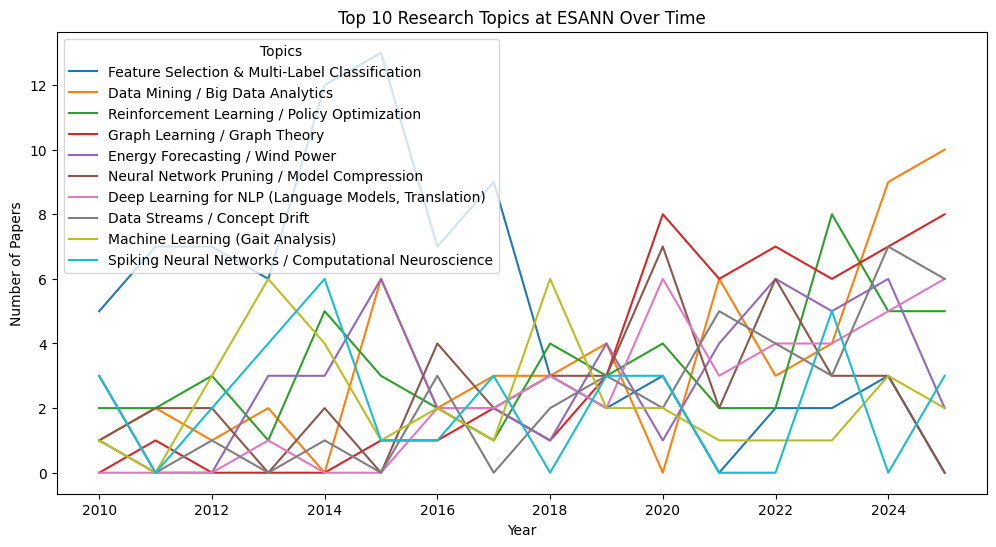

In [26]:
# Count topic frequency per year
topic_trends = df.groupby(['Year', 'topics']).size().reset_index(name='count')

# Pivot for plotting
topic_pivot = topic_trends.pivot(index='Year', columns='topics', values='count').fillna(0)

# Plot trends of most common topics
top_topics = topic_pivot.sum().sort_values(ascending=False).head(10).index
topic_pivot[top_topics].plot(figsize=(12,6))
plt.title("Top 10 Research Topics at ESANN Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.legend(title="Topics")
plt.show()


In [27]:
# Use raw counts instead of normalized values
topic_counts = topic_pivot.copy()

def classify_topic(series, year_index):
    values = series.values
    years = year_index.values

    if values.sum() < 3:   # only discard ultra-rare topics
        return "rare"

    first_nonzero = years[np.argmax(values > 0)]
    last_nonzero = years[len(values) - np.argmax(values[::-1] > 0) - 1]

    slope = np.polyfit(years, values, 1)[0]  # trend slope

    # Classification logic
    if first_nonzero > years.min() + (years.max()-years.min())*0.3:
        return "emerging"
    elif slope < -0.05 and last_nonzero < years.max():
        return "declining"
    elif slope > 0.05:
        return "growing"
    else:
        return "persistent"

# Apply new classification
topic_classes = {
    topic: classify_topic(topic_counts[topic], topic_counts.index)
    for topic in topic_counts.columns
}

topic_classes_df = pd.DataFrame.from_dict(topic_classes, orient='index', columns=['status'])

# Show summary
print(topic_classes_df['status'].value_counts())

# Show examples
for cat in topic_classes_df['status'].unique():
    print(f"\n{cat.upper()} TOPICS:")
    print(topic_classes_df[topic_classes_df['status'] == cat].head(10))


status
persistent    13
growing       12
declining      7
emerging       5
Name: count, dtype: int64

EMERGING TOPICS:
                                                   status
3D Image Segmentation / Plant Phenotyping        emerging
Adversarial Machine Learning                     emerging
Convolutional Neural Networks (Computer Vision)  emerging
Medical Imaging / Segmentation                   emerging
Quantum Machine Learning                         emerging

PERSISTENT TOPICS:
                                                        status
Astronomy / Computer Vision                         persistent
Causal Inference & Causal Learning                  persistent
Deep Graph Learning                                 persistent
Deep Learning (Sequence Prediction)                 persistent
Large-Scale Graph Analysis                          persistent
Machine Learning (Gait Analysis)                    persistent
Machine Learning (Predictive Modeling, Likelihood)  persistent
Machine L

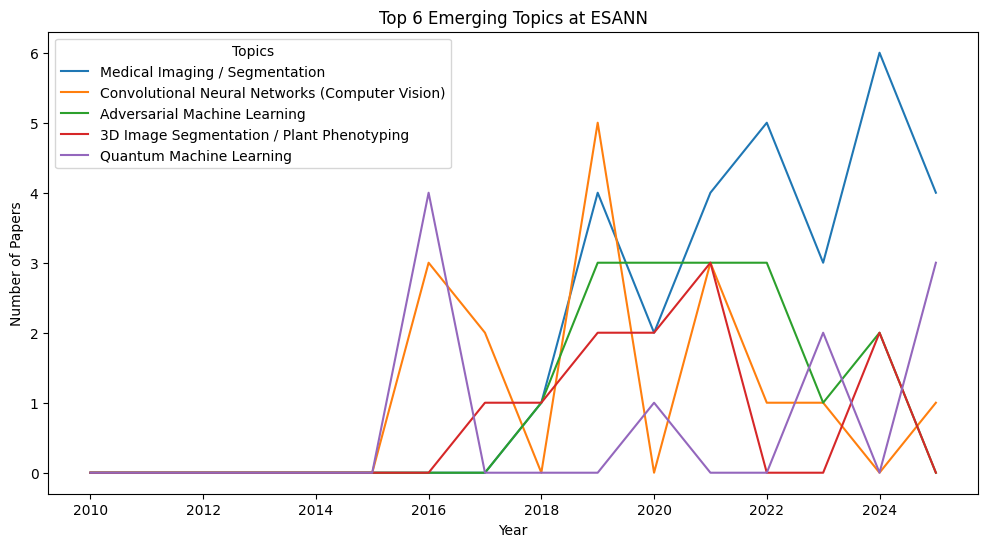

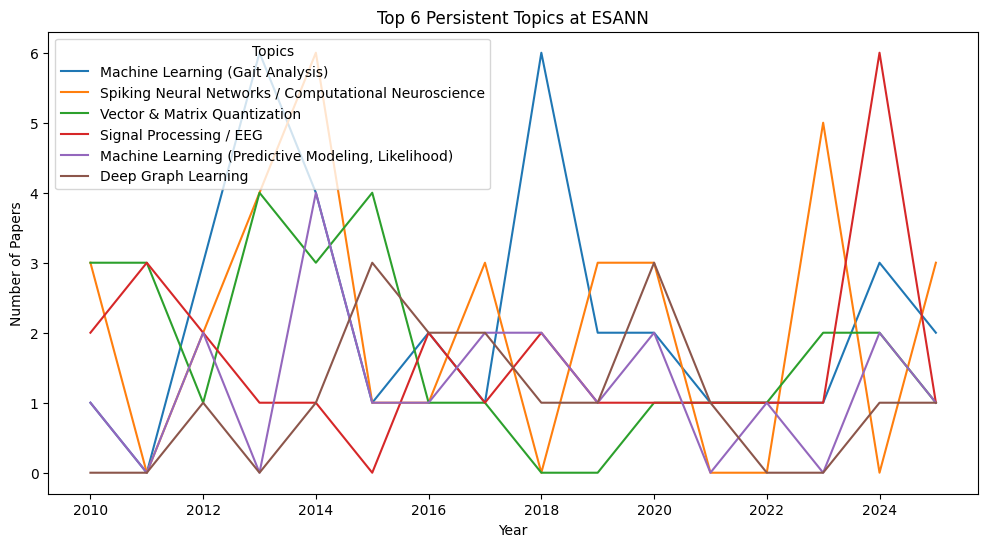

In [139]:
import matplotlib.pyplot as plt

def plot_category(cat, n=8):
    topics_in_cat = topic_classes_df[topic_classes_df['status'] == cat].index
    top = topic_counts[topics_in_cat].sum().sort_values(ascending=False).head(n).index
    
    topic_counts[top].plot(figsize=(12,6))
    plt.title(f"Top {n} {cat.capitalize()} Topics at ESANN")
    plt.xlabel("Year")
    plt.ylabel("Number of Papers")
    plt.legend(title="Topics")
    plt.show()

# Plot each category
for cat in ["emerging", "persistent"]:
    plot_category(cat, n=6)


In [124]:
import pandas as pd
import plotly.graph_objects as go

# Take top 15 topics overall to keep it readable
top_topics = df['topics'].value_counts().head(30).index
df_top = df[df['topics'].isin(top_topics)]

# Bin years into 5-year intervals
bins = list(range(df_top['Year'].min(), df_top['Year'].max()+5, 5))
labels = [f"{b}-{b+4}" for b in bins[:-1]]
df_top['interval'] = pd.cut(df_top['Year'], bins=bins, labels=labels, right=True)

# Count topics per interval
topic_interval = df_top.groupby(['interval', 'topics']).size().reset_index(name='count')
topic_pivot_5yr = topic_interval.pivot(index='interval', columns='topics', values='count').fillna(0)

# --- Sankey prep ---
nodes, node_index = [], {}
i = 0
for interval in topic_pivot_5yr.index:
    for topic in topic_pivot_5yr.columns:
        if topic_pivot_5yr.loc[interval, topic] > 0:
            name = f"{interval} - {topic}"
            nodes.append(name)
            node_index[(interval, topic)] = i
            i += 1

sources, targets, values = [], [], []
intervals = list(topic_pivot_5yr.index)


for i1, i2 in zip(intervals[:-1], intervals[1:]):
    for topic in topic_pivot_5yr.columns:
        v1 = topic_pivot_5yr.loc[i1, topic]
        v2 = topic_pivot_5yr.loc[i2, topic]
        if v1 > 0 and v2 > 0:
            sources.append(node_index[(i1, topic)])
            targets.append(node_index[(i2, topic)])
            values.append(min(v1, v2))

# Plot
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",   # keeps alignment by time
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title_text="Topic Evolution (5-Year Blocks)", font_size=10)
fig.update_layout(
    autosize=True
)

fig.show()


/tmp/ipykernel_15189/3542297175.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_15189/3542297175.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [103]:
# Build dataframe for RAWGraphs
edges_df = pd.DataFrame({
    "Source": [nodes[s] for s in sources],
    "Target": [nodes[t] for t in targets],
    "Weight": pd.to_numeric(values, errors="coerce"),  # force numeric
    "Color": [nodes[s].split(" - ", 1)[1] for s in sources]  # just the topic name
})

# Save to CSV
edges_df.to_csv("sankey_for_rawgraphs.csv", index=False)


In [152]:
import plotly.graph_objects as go

# Example: assign colors per node (same order as your nodes list)
node_colors = [
    "royalblue", "orange", "lightgreen", "lightcoral",
    "mediumpurple", "gold", "teal", "salmon",
    "slategray", "turquoise", "violet", "khaki",
    "lightblue", "plum", "darkcyan", "royalblue", "orange", "lightgreen", "lightcoral",
    "mediumpurple", "gold", "teal", "salmon",
    "slategray", "turquoise", "violet", "khaki",
    "lightblue", "plum", "darkcyan","royalblue", "orange", "lightgreen", "lightcoral",
    "mediumpurple", "gold", "teal", "salmon",
    "slategray", "turquoise", "violet", "khaki",
    "lightblue", "plum", "darkcyan","royalblue", "orange", "lightgreen", "lightcoral",
    "mediumpurple", "gold", "teal", "salmon",
    "slategray", "turquoise", "violet", "khaki",
    "lightblue", "plum", "darkcyan"
] * 3  # repeat if needed

# Assign link colors (optional, can match source node)
link_colors = []
for s in sources:
    link_colors.append(node_colors[s])

fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=100,
        thickness=10,
        label=nodes,
        color=node_colors  # set custom node colors
        
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors  # makes links follow source color
    )
)])

fig.update_layout(title_text="Topic Evolution", font_size=10)
fig.update_layout(
    font=dict(size=40),   # increase font size for labels
    width=3500,           # wider figure
    height=1000           # taller figure
)
fig.update_layout(
    font=dict(size=14, color="black")
)
fig.show()


The analysis of ESANN publications across three consecutive five-year intervals (2010–2014, 2015–2019, 2020–2024) reveals clear patterns in the evolution of research topics. The Sankey diagram illustrates how themes have emerged, persisted, or declined, and how these dynamics reflect broader developments in machine learning.

Several themes demonstrate persistence across the entire period. Topics such as Data Mining / Big Data Analytics, Concept Drift / Data Streams, and Reinforcement Learning / Policy Optimization remain present from 2010 through 2024. Their continuity suggests that fundamental challenges in handling large-scale data, adapting to non-stationary environments, and optimizing sequential decision-making have remained central to the ESANN community. These enduring themes align with the broader machine learning agenda, where robust data-driven methods and reinforcement learning continue to form the backbone of both academic research and applied systems.

By contrast, some themes show emergence during the mid-2010s in parallel with major breakthroughs in the wider field. Deep Learning for NLP becomes visible from 2015 onwards, reflecting the global shift towards neural architectures for language modeling and translation, and later the dominance of transformer-based models. Similarly, Medical Imaging / Segmentation gains prominence in the same period, highlighting the rapid adoption of convolutional neural networks in biomedical applications. In the late 2010s, Neural Network Pruning / Model Compression emerges as an important line of inquiry, responding to growing concerns about efficiency, scalability, and the deployment of deep learning in resource-constrained environments.

At the same time, certain topics appear to decline in significance. Feature Selection & Multi-label Classification, once prominent in 2010–2014, becomes less central in subsequent years. This decline parallels the broader replacement of manual feature engineering with representation learning in deep neural networks. Similarly, application-specific themes such as Energy Forecasting / Wind Power remain present but diminish in comparative influence, as attention shifts to more generalizable methodological advances.

Taken together, the evolution of topics at ESANN reflects the wider trajectory of machine learning over the past decade. The community has transitioned from a focus on traditional techniques and handcrafted features toward deep learning paradigms, efficiency-driven methods, and interdisciplinary applications. The persistence of certain foundational areas alongside the rise and decline of others demonstrates how ESANN both mirrors and contributes to the shifting landscape of machine learning research.

In [109]:
fig.write_html("topic_evolution_sankey.html")


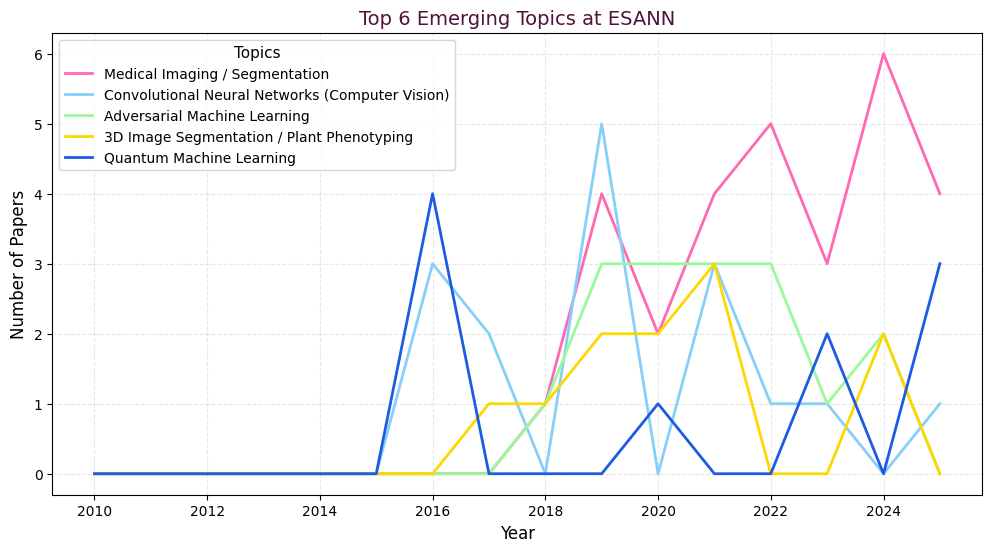

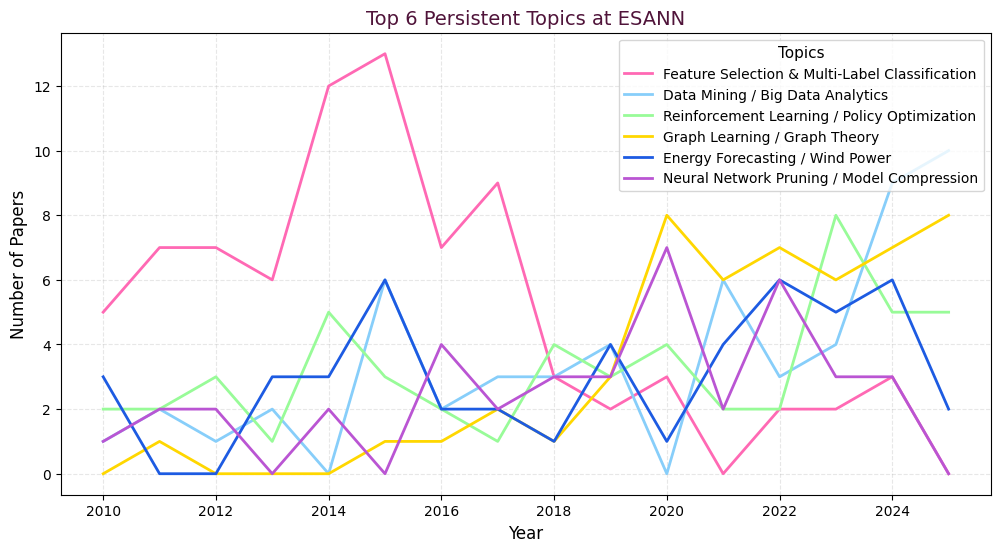

In [147]:
import matplotlib.pyplot as plt

# Distinct pastel color palette (10 colors)
distinct_pastel_colors = [
    "#FF69B4",  # Hot Pink
    "#87CEFA",  # Light Sky Blue
    "#98FB98",  # Pale Green
    "#FFD700",  # Gold
    "#1D5BE2",  # Light Pink
    "#BA55D3",  # Medium Orchid
    "#C16F4E",  # Light Salmon
    "#40E0D0",  # Turquoise
    "#D4A329",  # Light Coral
    "#9370DB"   # Medium Purple
]

def plot_category_distinct(cat, n=6):
    topics_in_cat = topic_classes_df[topic_classes_df['Category'] == cat].index
    top = topic_year_counts[topics_in_cat].sum().sort_values(ascending=False).head(n).index
    
    ax = topic_year_counts[top].plot(
        figsize=(12,6), 
        color=distinct_pastel_colors[:len(top)], 
        linewidth=2
    )
    plt.title(f"Top {n} {cat} Topics at ESANN", fontsize=14, color="#50143A")
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Number of Papers", fontsize=12)
    plt.legend(title="Topics", fontsize=10, title_fontsize=11)
    plt.grid(alpha=0.3, linestyle="--")
    plt.show()

# Example usage
plot_category_distinct("Emerging", n=6)
plot_category_distinct("Persistent", n=6)


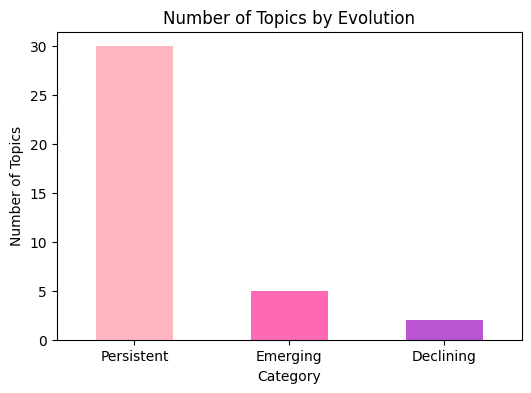

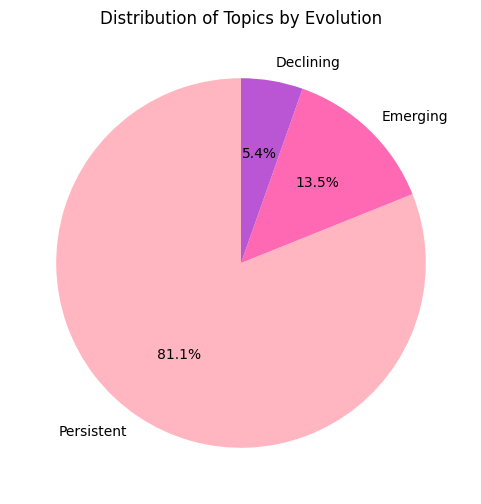

In [149]:
# --- Bar chart: absolute counts ---
plt.figure(figsize=(6,4))
category_counts.plot(
    kind="bar", 
    color=["#FFB6C1", "#FF69B4", "#BA55D3", "#DA70D6"]  # pastel pinks & purples
)
plt.title("Number of Topics by Evolution")
plt.xlabel("Category")
plt.ylabel("Number of Topics")
plt.xticks(rotation=0)
plt.show()

# --- Pie chart: proportions ---
plt.figure(figsize=(6,6))
category_counts.plot(
    kind="pie",
    autopct='%1.1f%%',
    colors=["#FFB6C1", "#FF69B4", "#BA55D3", "#DA70D6"],  # same palette for consistency
    startangle=90
)
plt.title("Distribution of Topics by Evolution")
plt.ylabel("")
plt.show()
